In [1]:
from __future__ import print_function
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, Iterator
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import BatchNormalization, AveragePooling2D, Input, Flatten, Dropout
from layer_utils import activation_quant, conv2d_noise, dense_noise, noise_injection
from layers_numpy import quantize_unsigned, quantize_rescale
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Set the matplotlib default settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
batch_size = 128  # orig paper trained all networks with batch_size=128
epochs = 20
weight_noise_train = 0.20
weight_noise_test = 0.0
activation_bits = 3
num_classes = 10

In [3]:
num_segment_previous = 1
num_segment_current = 1

model_name = 'filter16_act%db_wnoise%.2f_input0.95' % (activation_bits, weight_noise_train)
model_type = 'ResNet%dv%d_%s' % (20, 1, model_name)
orig_model_name = 'fwd_finetune_all_val'  # 'cifar10_%s_model' % model_type

print('Model name: %s' % model_type)

finetune_previous_layer = 'add_7'
finetune_current_layer = 'conv2d_noise_20'
print('Finetuning input from %s' % finetune_current_layer)
ft_model_name = 'fwd_finetune_%s_relu_decay_1e-3_3' % finetune_current_layer

Model name: ResNet20v1_filter16_act3b_wnoise0.20_input0.95
Finetuning input from conv2d_noise_4


In [116]:
def resnet20_finetune(activation_bits, weight_noise_train, weight_noise_test, relu_decay, trainable_relu=True):
    # Build model for finetuning

    layer_input_0 = Input(shape=(8, 8, 64)) # a new input tensor to be able to feed the desired layer
    layer_input_1 = Input(shape=(8, 8, 64))
    
    y = noise_injection(0.0)(layer_input_0)
    x = noise_injection(0.0)(layer_input_1)

#     create the new nodes for each layer in the path

#     y = conv2d_noise(16, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise')(y)
#     y = BatchNormalization(name='batch_normalization')(y)
#     y = activation_quant(num_bits=activation_bits, max_value=3, name='activation_quant')(y)

    # Stack 1, block 1
#     x = conv2d_noise(16, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_1')(y)
#     x = BatchNormalization(name='batch_normalization_1')(x)
#     x = activation_quant(num_bits=activation_bits, max_value=3, name='activation_quant_1')(x)
#     x = conv2d_noise(16, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_2')(x)
#     x = BatchNormalization(name='batch_normalization_2')(x)
#     y = keras.layers.add([y, x])
#     y = activation_quant(num_bits=activation_bits, max_value=3, name='activation_quant_2')(y)

    # Stack 1, block 2
#     x = conv2d_noise(16, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_3')(y)
#     x = BatchNormalization(name='batch_normalization_3')(x)
#     x = activation_quant(num_bits=activation_bits, max_value=3, name='activation_quant_3')(x)
#     x = conv2d_noise(16, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_4')(x)
#     x = BatchNormalization(name='batch_normalization_4')(x)
#     y = keras.layers.add([y, x])
#     y = activation_quant(num_bits=activation_bits, max_value=3, name='activation_quant_4')(y)

    # Stack 1, block 3
#     x = conv2d_noise(16, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_5')(y)
#     x = BatchNormalization(name='batch_normalization_5')(x)
#     x = activation_quant(num_bits=activation_bits, max_value=3, name='activation_quant_5')(x)
#     x = conv2d_noise(16, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_6')(x)
#     x = BatchNormalization(name='batch_normalization_6')(x)
#     y = keras.layers.add([y, x])
#     y = activation_quant(num_bits=activation_bits, max_value=3, name='activation_quant_6')(y)

    # Stack 2, block 1
#     x = conv2d_noise(32, strides=2, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_7')(y)
#     x = BatchNormalization(name='batch_normalization_7')(x)
#     x = activation_quant(num_bits=activation_bits, max_value=3, name='activation_quant_7')(x)
#     x = conv2d_noise(32, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_8')(x)
#     y = conv2d_noise(32, kernel_size=1, strides=2, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_9')(y)
#     x = BatchNormalization(name='batch_normalization_8')(x)
#     y = keras.layers.add([y, x])
#     y = activation_quant(num_bits=activation_bits, max_value=3, decay=relu_decay, name='activation_quant_8')(y)

    # Stack 2, block 2
#     x = conv2d_noise(32, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_10')(y)
#     x = BatchNormalization(name='batch_normalization_9')(x)
#     x = activation_quant(num_bits=activation_bits, max_value=3, decay=relu_decay, name='activation_quant_9')(x)
#     x = conv2d_noise(32, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_11')(x)
#     x = BatchNormalization(name='batch_normalization_10')(x)
#     y = keras.layers.add([y, x])
#     y = activation_quant(num_bits=activation_bits, max_value=3, decay=relu_decay, trainable=trainable_relu, name='activation_quant_10')(y)

    # Stack 2, block 3
#     x = conv2d_noise(32, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_12')(y)
#     x = BatchNormalization(name='batch_normalization_11')(x)
#     x = activation_quant(num_bits=activation_bits, max_value=3, decay=relu_decay, trainable=trainable_relu, name='activation_quant_11')(x)
#     x = conv2d_noise(32, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_13')(x)
#     x = BatchNormalization(name='batch_normalization_12')(x)
#     y = keras.layers.add([y, x])
#     y = activation_quant(num_bits=activation_bits, max_value=3, decay=relu_decay, trainable=trainable_relu, name='activation_quant_12')(y)

    # Stack 3, block 1
#     x = conv2d_noise(64, strides=2, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_14')(y)
#     x = BatchNormalization(name='batch_normalization_13')(x)
#     x = activation_quant(num_bits=activation_bits, max_value=3, decay=relu_decay, trainable=trainable_relu, name='activation_quant_13')(x)
#     x = conv2d_noise(64, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_15')(x)
#     y = conv2d_noise(64, kernel_size=1, strides=2, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_16')(y)
#     x = BatchNormalization(name='batch_normalization_14')(x)
#     y = keras.layers.add([y, x])
#     y = activation_quant(num_bits=activation_bits, max_value=3, decay=relu_decay, trainable=trainable_relu, name='activation_quant_14')(y)

    # Stack 3, block 2
#     x = conv2d_noise(64, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_17')(y)
#     x = BatchNormalization(name='batch_normalization_15')(x)
#     x = activation_quant(num_bits=activation_bits, max_value=3, decay=relu_decay, trainable=trainable_relu, name='activation_quant_15')(x)
#     x = conv2d_noise(64, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_18')(x)
#     x = BatchNormalization(name='batch_normalization_16')(x)
#     y = keras.layers.add([y, x])
#     y = activation_quant(num_bits=activation_bits, max_value=3, decay=relu_decay, trainable=trainable_relu, name='activation_quant_16')(y)

    # Stack 3, block 3
#     x = conv2d_noise(64, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_19')(y)
#     x = BatchNormalization(name='batch_normalization_17')(x)
#     x = activation_quant(num_bits=activation_bits, max_value=3, decay=relu_decay, trainable=trainable_relu, name='activation_quant_17')(x)
#     x = conv2d_noise(64, strides=1, padding='same', noise_train=weight_noise_train, noise_test=weight_noise_test, name='conv2d_noise_20')(x)
#     x = BatchNormalization(name='batch_normalization_18')(x)
    y = keras.layers.add([y, x])

    y = AveragePooling2D(pool_size=8)(y)
    y = Flatten()(y)
    y = activation_quant(num_bits=activation_bits, max_value=3, decay=relu_decay, trainable=trainable_relu, name='activation_quant_18')(y)

    outputs = dense_noise(10, activation='softmax', noise_train=weight_noise_train, noise_test=weight_noise_test, name='dense_noise')(y)

    # create the model
    model = Model([layer_input_0, layer_input_1], outputs)
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(1e-5),
                  metrics=['accuracy'])
    # 	model.summary()
    return model


def build_model(activation_bits, weight_noise_train, weight_noise_test, relu_decay, trainable_relu, weights_map):
    K.clear_session()
    model = resnet20_finetune(activation_bits, weight_noise_train, weight_noise_test, relu_decay, trainable_relu=trainable_relu)
    for klayer in model.layers:
        if klayer.name in weights_map:
            klayer.set_weights(weights_map[klayer.name])
    return model

In [5]:
# Load original model weights
ckpt_dir = os.path.join(os.getcwd(), model_type)
orig_path = os.path.join(ckpt_dir, orig_model_name)
orig_model = load_model(orig_path)
weights = {}
for olayer in orig_model.layers:
    weights[olayer.name] = olayer.get_weights()

In [117]:
# Load finetuning inputs
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

DATA_PATH = '/scratch/users/weierwan/finetune_all/'
# train_current_inputs = 0
# test_current_inputs = 0
# for i in range(2):
#     tmp = np.load(os.path.join(DATA_PATH, '%s_%d_train.npz' % (finetune_previous_layer, i)))
#     train_previous_inputs += (tmp['out_chip'] - tmp['intercept']) / tmp['slope']
#     tmp = np.load(os.path.join(DATA_PATH, '%s_%d_test.npz' % (finetune_current_layer, i)))
#     test_current_inputs += (tmp['out_chip'] - tmp['intercept']) / tmp['slope']
# train_current_inputs = 0
# test_current_inputs = 0
# for i in range(num_segment_current):
# 	tmp = np.load(os.path.join(DATA_PATH, '%s_%d_train.npz' % (finetune_current_layer, i)))
# 	train_current_inputs += (tmp['out_chip'] - tmp['intercept']) / tmp['slope']
# 	tmp = np.load(os.path.join(DATA_PATH, '%s_%d_test.npz' % (finetune_current_layer, i)))
# 	test_current_inputs += (tmp['out_chip'] - tmp['intercept']) / tmp['slope']

train_previous_inputs = np.load(os.path.join(DATA_PATH, '%s_train_pact.npy' % finetune_previous_layer))
test_previous_inputs = np.load(os.path.join(DATA_PATH, '%s.npy' % finetune_previous_layer))

# tmp = np.load(os.path.join(DATA_PATH, '%s.npz' % finetune_previous_layer))
# test_previous_inputs = tmp['input_sample_test']
# train_previous_inputs = tmp['input_sample_train']
# relux = tmp['relux']

train_current_inputs = np.load(os.path.join(DATA_PATH, '%s_train_pact.npy' % finetune_current_layer))
test_current_inputs = np.load(os.path.join(DATA_PATH, '%s.npy' % finetune_current_layer))

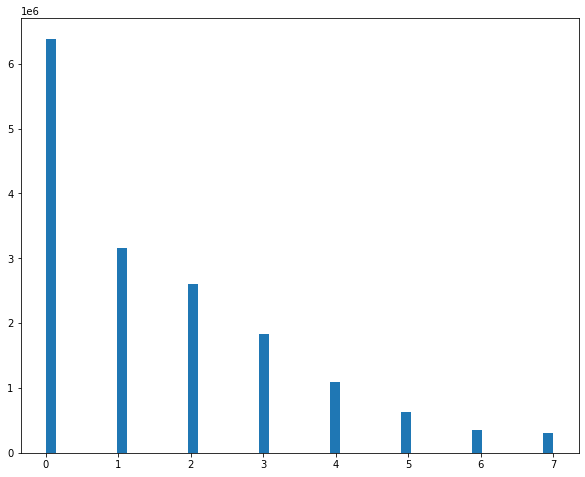

In [81]:
plt.hist(test_previous_inputs[:1000].flatten(), 50);

In [ ]:
print(weights['activation_quant_16'][0])
print(relux)

In [167]:
train_previous_inputs = quantize_rescale(train_previous_inputs, 3, relux)
test_previous_inputs = quantize_rescale(test_previous_inputs, 3, relux)

In [14]:
split = 10000
total_index = np.arange(50000)
# val_index = np.random.choice(total_index, split, replace=False)
val_index = np.load('val_index.npy')
train_index = np.delete(total_index, val_index)

val_previous_inputs_div = train_previous_inputs[val_index]
train_previous_inputs_div = train_previous_inputs[train_index]
val_current_inputs_div = train_current_inputs[val_index]
train_current_inputs_div = train_current_inputs[train_index]
y_val_div = y_train[val_index]
y_train_div = y_train[train_index]

In [161]:
np.save('val_index', val_index)

In [118]:
# Evaluate the model before the fine-tuning (without noise injection)

model = build_model(activation_bits, weight_noise_train, weight_noise_test, 1e-3, True, weights)
accuracy_train_nf = model.evaluate([train_previous_inputs, train_current_inputs], y_train, verbose=1)[1]
accuracy_test_nf = model.evaluate([test_previous_inputs, test_current_inputs], y_test, verbose=1)[1]
accuracy_val_nf = model.evaluate([val_previous_inputs_div, val_current_inputs_div], y_val_div, verbose=1)[1]

print('Noise-free train accuracy:', accuracy_train_nf)
print('Noise-free test accuracy:', accuracy_test_nf)
print('noisy train accuracy:', accuracy_train.mean())
print('noisy test accuracy:', accuracy_test.mean())

10000/10000 [==============================] - 1s 65us/sample - loss: 0.5399 - accuracy: 0.8393


In [119]:
# Evaluate the model before the fine-tuning (with noise injection)
model = build_model(activation_bits, weight_noise_train, 0.1, 1e-3, True, weights)
accuracy = np.zeros(10)
for i in range(10):
    accuracy[i] = model.evaluate([test_previous_inputs, test_current_inputs], y_test, verbose=1)[1]
print(accuracy.mean())

10000/10000 [==============================] - 1s 54us/sample - loss: 0.5417 - accuracy: 0.8379
0.8385799944400787


In [111]:
model = build_model(activation_bits, weight_noise_train, weight_noise_test, 1e-3, True, weights)
intermediate_layer_model = keras.Model(inputs=model.input,
                                 outputs=model.get_layer('activation_quant_16').output)
test_previous_inputs = intermediate_layer_model.predict([test_previous_inputs, test_current_inputs])
train_previous_inputs = intermediate_layer_model.predict([train_previous_inputs, train_current_inputs])

In [41]:
relux = weights['activation_quant_16'][0]
input_sample_test = quantize_unsigned(test_previous_inputs, 3, relux)
input_sample_train = quantize_unsigned(train_previous_inputs, 3, relux)

In [11]:
np.save(os.path.join(DATA_PATH, 'activation_quant_16_test_pact'), test_previous_inputs)
np.save(os.path.join(DATA_PATH, 'activation_quant_16_train_pact'), train_previous_inputs)

In [46]:
# Fine-tune
# model = build_model(activation_bits, weight_noise_train, weight_noise_test, weights)
ckpt_dir = os.path.join(os.getcwd(), model_type)
ft_path = os.path.join(ckpt_dir, ft_model_name)
checkpoint = ModelCheckpoint(filepath=ft_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

model.fit([train_previous_inputs, train_current_inputs], y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=([test_previous_inputs, test_current_inputs], y_test),
          shuffle=True)
#           callbacks=[checkpoint])

model.save(ft_path + '_final')

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2s 36us/sample - loss: 0.1138 - accuracy: 0.9615 - val_loss: 0.5243 - val_accuracy: 0.8559
Epoch 2/5
50000/50000 [==============================] - 1s 27us/sample - loss: 0.1146 - accuracy: 0.9627 - val_loss: 0.5245 - val_accuracy: 0.8563
Epoch 3/5
50000/50000 [==============================] - 1s 26us/sample - loss: 0.1140 - accuracy: 0.9628 - val_loss: 0.5249 - val_accuracy: 0.8564
Epoch 4/5
50000/50000 [==============================] - 1s 27us/sample - loss: 0.1145 - accuracy: 0.9622 - val_loss: 0.5253 - val_accuracy: 0.8562
Epoch 5/5
50000/50000 [==============================] - 1s 27us/sample - loss: 0.1140 - accuracy: 0.9623 - val_loss: 0.5255 - val_accuracy: 0.8562
INFO:tensorflow:Assets written to: /home/users/weierwan/cifar10_resnet_neurram/ResNet20v1_filter16_act3b_wnoise0.20_input0.95/fwd_finetune_conv2d_noise_20_relu_decay_1e-3_2_final/assets


In [175]:
model.save(ft_path + '_final_3')

INFO:tensorflow:Assets written to: /home/users/weierwan/cifar10_resnet_neurram/ResNet20v1_filter16_act3b_wnoise0.20_input0.95/fwd_finetune_conv2d_noise_9_relu_decay_1e-1_4_final_3/assets


In [42]:
# Fine-tune with feature map augmentation

model = build_model(activation_bits, weight_noise_train, weight_noise_test, weights)
ckpt_dir = os.path.join(os.getcwd(), model_type)
ft_path = os.path.join(ckpt_dir, ft_model_name)
checkpoint = ModelCheckpoint(filepath=ft_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

print('Using real-time data augmentation.')

data_gen_args = dict(
    # set input mean to 0 over the dataset
    featurewise_center=False,
    # set each sample mean to 0
    samplewise_center=False,
    # divide inputs by std of dataset
    featurewise_std_normalization=False,
    # divide each input by its std
    samplewise_std_normalization=False,
    # apply ZCA whitening
    zca_whitening=False,
    # epsilon for ZCA whitening
    zca_epsilon=1e-06,
    # randomly rotate images in the range (deg 0 to 180)
    rotation_range=0,
    # randomly shift images horizontally
    width_shift_range=0.0,
    # randomly shift images vertically
    height_shift_range=0.0,
    # set range for random shear
    shear_range=0.,
    # set range for random zoom
    zoom_range=0.,
    # set range for random channel shifts
    channel_shift_range=0.,
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    # value used for fill_mode = "constant"
    cval=0.,
    # randomly flip images
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=False,
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

previous_datagen = ImageDataGenerator(**data_gen_args)
# current_datagen = ImageDataGenerator(**data_gen_args)
seed = 1


# def generator_two_img(gen1, gen2, X1, X2, y, batch_size):
#     genX1 = gen1.flow(X1, y,  batch_size=batch_size, seed=1)
#     genX2 = gen2.flow(X2, y, batch_size=batch_size, seed=1)
#     while True:
#         X1i = genX1.next()
#         X2i = genX2.next()
#         yield [X1i[0], X2i[0]], X1i[1]

# train_generator = generator_two_img(previous_datagen, previous_datagen, train_previous_inputs_div, train_current_inputs_div, y_train_div, batch_size)
train_generator = previous_datagen.flow(train_previous_inputs_div, y_train_div, batch_size=batch_size, seed=seed)

# # Fit the model on the batches generated by datagen.flow().
model.fit(train_generator, steps_per_epoch = 160,
        validation_data=([val_previous_inputs_div], y_val_div),
        epochs=epochs,
        callbacks=[checkpoint])

Using real-time data augmentation.
  ...
    to  
  ['...']
Train for 160 steps, validate on 10000 samples
Epoch 1/20
159/160 [============================>.] - ETA: 0s - loss: 0.3227 - accuracy: 0.8884
Epoch 00001: val_accuracy improved from -inf to 0.92200, saving model to /home/users/weierwan/cifar10_resnet_neurram/ResNet20v1_filter16_act3b_wnoise0.20_input0.95/fwd_finetune_all_val_2
INFO:tensorflow:Assets written to: /home/users/weierwan/cifar10_resnet_neurram/ResNet20v1_filter16_act3b_wnoise0.20_input0.95/fwd_finetune_all_val_2/assets
160/160 [==============================] - 21s 131ms/step - loss: 0.3228 - accuracy: 0.8885 - val_loss: 0.2416 - val_accuracy: 0.9220
Epoch 2/20
159/160 [============================>.] - ETA: 0s - loss: 0.3274 - accuracy: 0.8861
Epoch 00002: val_accuracy did not improve from 0.92200
160/160 [==============================] - 5s 30ms/step - loss: 0.3272 - accuracy: 0.8863 - val_loss: 0.2368 - val_accuracy: 0.9213
Epoch 3/20
159/160 [=================

In [49]:
# Score fine-tuned model.
ckpt_dir = os.path.join(os.getcwd(), model_type)
# ft_model_name = 'fwd_finetune_%s_relu_decay_1e-2_3_final' % finetune_current_layer
ft_path = os.path.join(ckpt_dir, ft_model_name + '_final')
model = load_model(ft_path)
weights_ft = {}
for klayer in model.layers:
    weights_ft[klayer.name] = klayer.get_weights()

accuracy_train_nf = model.evaluate([train_previous_inputs, train_current_inputs], y_train, verbose=1)[1]
accuracy_test_nf = model.evaluate([test_previous_inputs, test_current_inputs], y_test, verbose=1)[1]
accuracy_val_nf = model.evaluate([val_previous_inputs_div, val_current_inputs_div], y_val_div, verbose=1)[1]

10000/10000 [==============================] - 1s 53us/sample - loss: 0.5255 - accuracy: 0.8562


In [ ]:
model = build_model(activation_bits, weight_noise_train, 0.2, weights_ft)
accuracy = np.zeros(10)
for i in range(10):
    accuracy[i] = model.evaluate([test_previous_inputs, test_current_inputs], y_test, verbose=1)[1]
print(accuracy.mean())